#House Sales in King County, USA

I will analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on.

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

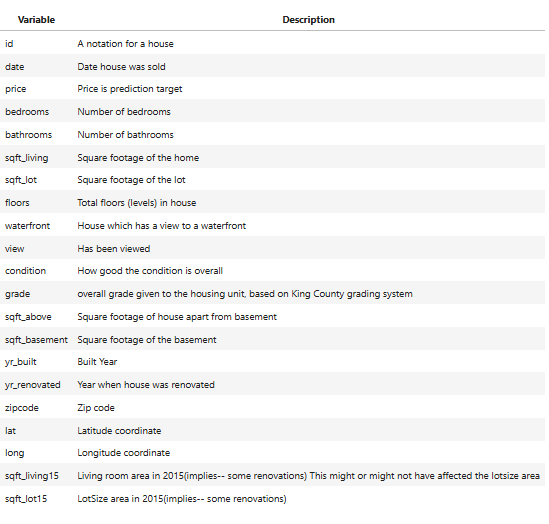

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

#Importing Data Sets

In [2]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(filepath)

In [ ]:
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [ ]:
print(df.describe())

        Unnamed: 0            id         price      bedrooms     bathrooms  \
count  21613.00000  2.161300e+04  2.161300e+04  21600.000000  21603.000000   
mean   10806.00000  4.580302e+09  5.400881e+05      3.372870      2.115736   
std     6239.28002  2.876566e+09  3.671272e+05      0.926657      0.768996   
min        0.00000  1.000102e+06  7.500000e+04      1.000000      0.500000   
25%     5403.00000  2.123049e+09  3.219500e+05      3.000000      1.750000   
50%    10806.00000  3.904930e+09  4.500000e+05      3.000000      2.250000   
75%    16209.00000  7.308900e+09  6.450000e+05      4.000000      2.500000   
max    21612.00000  9.900000e+09  7.700000e+06     33.000000      8.000000   

        sqft_living      sqft_lot        floors    waterfront          view  \
count  21613.000000  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean    2079.899736  1.510697e+04      1.494309      0.007542      0.234303   
std      918.440897  4.142051e+04      0.539989      0.08651

#Data Wrangling

Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Make sure the inplace parameter is set to True.

In [3]:
df.drop(['id','Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df.describe()

In [5]:
df.replace('?',np.nan,inplace=True)

In [6]:
#identify the columns that have some 'Null' (or NaN) information.

#bedrooms column has 13 missing values
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
#bathrooms column has 10 missing values
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [7]:
#We can replace the missing values of the column 'bedrooms' with the mean of the column
avg_bedrooms=df['bedrooms'].mean(axis=0)
df['bedrooms']=df['bedrooms'].replace(np.nan,avg_bedrooms)

In [8]:
#We also replace the missing values of the column 'bathrooms' with the mean of the column
avg_bathrooms=df['bathrooms'].mean(axis=0)
df['bathrooms']=df['bathrooms'].replace(np.nan,avg_bathrooms)

In [9]:
#number of null values
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


#Exploratory Data Analysis

Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a data frame.

In [ ]:
df['floors'].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers.

<Axes: xlabel='waterfront', ylabel='price'>

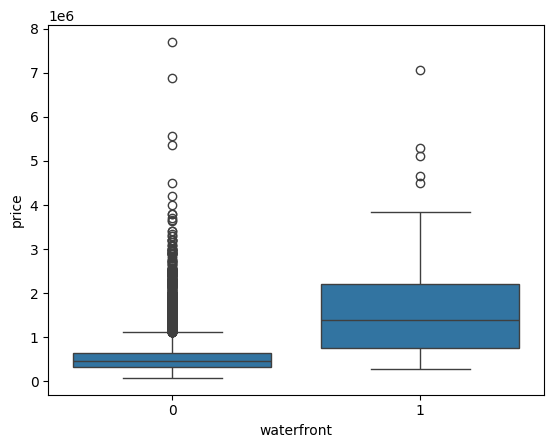

In [10]:
sns.boxplot(x='waterfront',y='price',data=df)

Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.

<Axes: xlabel='sqft_above', ylabel='price'>

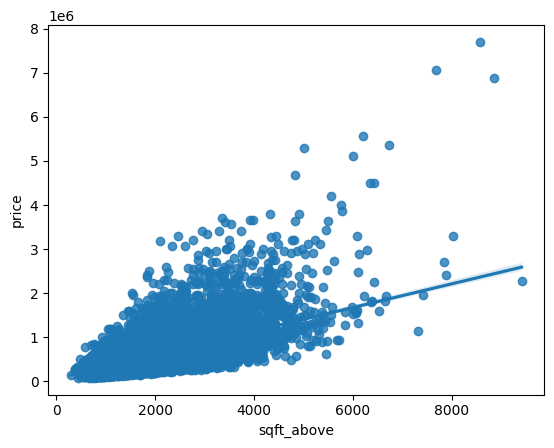

In [11]:
sns.regplot(x='sqft_above',y='price',data=df)

In [12]:
#find the feature other than price that is most correlated with price.
df1=df.drop('date',axis=1)

In [13]:
df1.corr()['price'].sort_values()

,price
zipcode,-0.053203
long,0.021626
condition,0.036362
yr_built,0.054012
sqft_lot15,0.082447
sqft_lot,0.089661
yr_renovated,0.126434
floors,0.256794
waterfront,0.266369
lat,0.307003


##Conclusion: Important Variables
We now have a better idea of what our data looks like and which variables are important to take into account when predicting the house price. We have narrowed it down to the following variables:

Continuous numerical variables: sqft_living15, sqft_above, sqft_living

Categorical variables: bathrooms and grade

As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.

#Model Development

In [21]:
#We can Fit a linear regression model using the longitude feature 'long' and caculate the R^2.
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
Yhat=lm.predict(X)
print('The R-square is: ', lm.score(X, Y))
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The R-square is:  0.00046769430149007363
The mean square error of price and predicted value is:  134713108191.87683


In [22]:
#Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2.
X=df[['sqft_living']]
lm.fit(X,Y)
Yhat=lm.predict(X)
print('the R^2 score is: ',lm.score(X,Y))
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

the R^2 score is:  0.4928532179037931
The mean square error of price and predicted value is:  68351286833.039825


In [23]:
#Fit a linear regression model to predict the 'price' using the list of features:
features =df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
lm.fit(features,Y)
print('the R^2 score is: ',lm.score(features,Y))
Y_predict_multifit = lm.predict(features)
print('The mean square error of price and predicted value using multifit is: ', mean_squared_error(df['price'], Y_predict_multifit))

the R^2 score is:  0.65769516660375
The mean square error of price and predicted value using multifit is:  46134524910.3139


In [25]:
#Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2.
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(Input)
features=features.astype(float)
pipe.fit(features,Y)
ypipe=pipe.predict(features)
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))

R^2 for multi-variable polynomial pipeline is:  0.7513408515988734
MSE for multi-variable polynomial pipeline is:  33513320750.599987


##Prediction and Decision Making
The values of R^2 increase as we go from Single Linear Regression to Multiple Linear Regression. Further, if we go for multiple linear regression extended with polynomial features, we get an even better R^2 value and a lower MSE.

#Model Evaluation and Refinement

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [27]:
#split the data into training and testing sets:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [28]:
#Create and fit a Ridge regression object using the training data, set the
#regularization parameter to 0.1, and calculate the R^2 using the test data.

#Let's create a Ridge regression object, setting the regularization parameter (alpha) to 0.1
RigeModel=Ridge(alpha=0.1)
#Like regular regression, you can fit the model using the method fit.
RigeModel.fit(x_train,y_train)
#Similarly, you can obtain a prediction:
yhat=RigeModel.predict(x_train)
test_score = RigeModel.score(x_test, y_test)
print("Test Score", test_score)

Test Score 0.6478759163939112


In [29]:
#Perform a second order polynomial transform on both the training data and testing data.
#Create and fit a Ridge regression object using the training data, set the regularisation
#parameter to 0.1, and calculate the R^2 utilising the test data provided.

pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)

#Let's create a Ridge regression object, setting the regularization parameter (alpha) to 0.1
RigeModel=Ridge(alpha=0.1)
#Like regular regression, you can fit the model using the method fit.
RigeModel.fit(x_train_pr,y_train)
#Similarly, you can obtain a prediction:
yhat=RigeModel.predict(x_train_pr)
test_score = RigeModel.score(x_test_pr, y_test)
print("Test Score", test_score)

Test Score 0.7002744267906067
